In [1]:
import os
from mdcrow import MDCrow

In [2]:
prompt13 = "Analyze the RDF of the simulation of 1A3N solvated in water."
llm_var = "claude-3-opus-20240229"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-opus-20240229


In [3]:
agent.run(prompt13)

Thought: To analyze the RDF of a simulation of 1A3N solvated in water, I will need to first download the PDB file for 1A3N, then set up and run a simulation of the protein solvated in water. After the simulation is complete, I can use the RDFTool to calculate the radial distribution function.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1A3N"
}
```

PDB file found with this ID: 1A3N
Here are the steps I will take to analyze the RDF of a simulation of 1A3N solvated in water:

Thought: I have downloaded the PDB file for 1A3N. Next, I need to set up and run a simulation of the protein solvated in water using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_182119",
    "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": 1.0,
      "constraints": "HBonds",
      "rigidWater": true

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_59
Files found in registry: 1A3N_182119: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_182119
 1A3N_182200: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_182213: Initial positions for simulation sim0_182213
 sim0_182213: Basic Simulation of Protein 1A3N_182200
 rec0_182221: Simulation trajectory for protein 1A3N_182200 and simulation sim0_182213
 rec1_182221: Simulation state log for protein 1A3N_182200 and simulation sim0_182213
 rec2_182221: Simulation pdb frames for protein 1A3N_182200 and simulation sim0_182213
 fig0_184812: RDF plot for the trajectory file with id: rec0_182221


In [5]:
import re
import os
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)

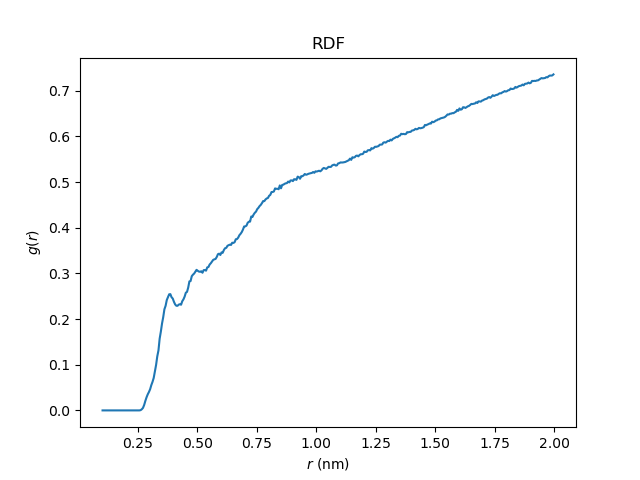

In [6]:
file_id1 = matches[0]
path1 = registry.get_mapped_path(file_id1)
assert os.path.exists(path1), "Path does not exist"
Image(filename=path1)